<a href="https://colab.research.google.com/github/haroon830/Basic-Machine-Learning/blob/main/Basic_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/content/House-Price.csv', header = 0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

In [4]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,1.000000


In [5]:
df.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [6]:
df.shape

(506, 19)

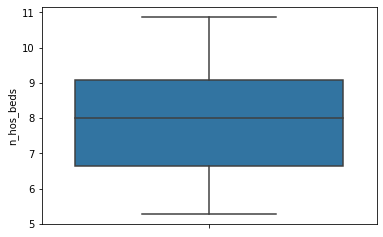

In [7]:
sns.boxplot(y='n_hos_beds', data=df)

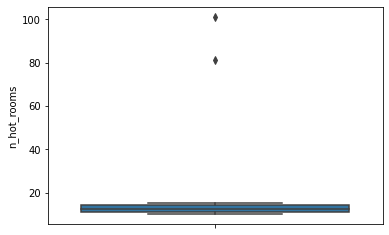

In [8]:
 sns.boxplot(y='n_hot_rooms', data=df)

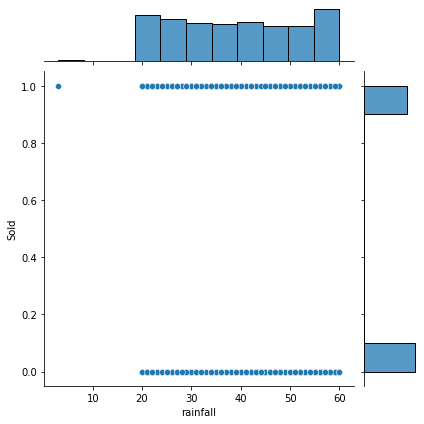

In [9]:
sns.jointplot(x='rainfall' ,y='Sold', data=df)

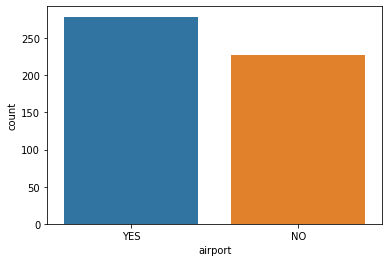

In [10]:
sns.countplot(x='airport' , data=df)

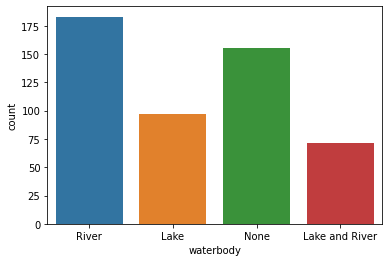

In [11]:
sns.countplot(x='waterbody', data=df)

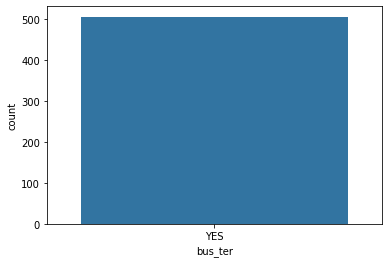

In [12]:
sns.countplot(x='bus_ter', data=df)

# **Observations**
1. Missing values in n_hos_beds
2. bus_ter has only one value
3. Outliers in n_hot_rooms and rainfall







In [13]:
# capping and flooring
np.percentile(df.n_hot_rooms,[99])

array([15.39952])

In [14]:
np.percentile(df.n_hot_rooms,[99])[0]

15.399519999999999

In [15]:
uv = np.percentile(df.n_hot_rooms,[99])[0]

In [16]:
df[(df.n_hot_rooms>uv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
2,34.7,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105,0
204,50.0,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178,0
267,50.0,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235,0
369,50.0,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477,0
423,13.4,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344,0


In [17]:
df.n_hot_rooms[(df.n_hot_rooms>3*uv)] = 3*uv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
np.percentile(df.rainfall,[1])

array([20.])

In [19]:
lv = np.percentile(df.rainfall,[1])[0]

In [20]:
df[(df.rainfall<lv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
213,28.1,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019,1


In [21]:
df.rainfall[(df.rainfall<0.3*lv)] = 0.3*lv      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

In [24]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean)

In [25]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,12.864050,39.187747,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,2.688778,12.497221,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,10.057600,6.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,46.198560,60.000000,0.086711,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   506 non-null    object 
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

In [27]:
df.fillna(df.mean())

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.48,11.19200,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.17280,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.26720,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.28960,Lake,55,YES,0.039474,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.17920,Lake and River,27,YES,0.056006,1
502,20.6,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.16480,Lake and River,20,YES,0.059903,1
503,23.9,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.19120,None,31,YES,0.057572,1
504,22.0,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.94,15.17600,None,47,YES,0.060694,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   506 non-null    object 
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

In [29]:
df['average_dist'] = (df.dist1 + df.dist2 + df.dist3 + df.dist4)/4

In [30]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hot_rooms,rainfall,parks,Sold,average_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,12.864050,39.187747,0.054454,0.454545,3.795104
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,2.688778,12.497221,0.010632,0.498422,2.105859
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,10.057600,6.000000,0.033292,0.000000,1.127500
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,11.189800,28.000000,0.046464,0.000000,2.100625
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,12.720000,39.000000,0.053507,0.000000,3.207500
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,14.170800,50.000000,0.061397,1.000000,5.187500
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,46.198560,60.000000,0.086711,1.000000,12.127500


In [31]:
del df['dist1']

In [32]:
del df['dist2']

In [33]:
del df['dist3']

In [34]:
del df['dist4']

In [35]:
df.describe()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hot_rooms,rainfall,parks,Sold,average_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,12.864050,39.187747,0.054454,0.454545,3.795104
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,2.688778,12.497221,0.010632,0.498422,2.105859
min,5.000000,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,10.057600,6.000000,0.033292,0.000000,1.127500
25%,17.025000,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,11.189800,28.000000,0.046464,0.000000,2.100625
50%,21.200000,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,12.720000,39.000000,0.053507,0.000000,3.207500
75%,25.000000,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,14.170800,50.000000,0.061397,1.000000,5.187500
max,50.000000,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,46.198560,60.000000,0.086711,1.000000,12.127500


In [36]:
del df['bus_ter']

In [37]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,average_dist
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.48,11.19200,River,23,0.049347,0,4.0875
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,0.046146,1,4.9675
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,0.045764,0,4.9675
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,0.047151,0,6.0650
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,0.039474,0,6.0625


In [38]:
df.describe()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hot_rooms,rainfall,parks,Sold,average_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,12.864050,39.187747,0.054454,0.454545,3.795104
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,2.688778,12.497221,0.010632,0.498422,2.105859
min,5.000000,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,10.057600,6.000000,0.033292,0.000000,1.127500
25%,17.025000,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,11.189800,28.000000,0.046464,0.000000,2.100625
50%,21.200000,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,12.720000,39.000000,0.053507,0.000000,3.207500
75%,25.000000,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,14.170800,50.000000,0.061397,1.000000,5.187500
max,50.000000,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,46.198560,60.000000,0.086711,1.000000,12.127500


In [39]:
df1 = pd.get_dummies(df['airport'])

In [40]:
df1.head()

,NO,YES
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [41]:
df = pd.concat([df, df1], axis=1)

In [42]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,average_dist,NO,YES
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.48,11.19200,River,23,0.049347,0,4.0875,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,0.046146,1,4.9675,1,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,0.045764,0,4.9675,1,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,0.047151,0,6.0650,0,1
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,0.039474,0,6.0625,1,0


In [43]:
del df['airport']

In [44]:
df2 = pd.get_dummies(df['waterbody'])

In [45]:
df2.head()

,Lake,Lake and River,None,River
0,0,0,0,1
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0


In [46]:
df = pd.concat([df, df2], axis=1)

In [47]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,average_dist,NO,YES,Lake,Lake and River,None,River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.48,11.19200,River,23,0.049347,0,4.0875,0,1,0,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,Lake,42,0.046146,1,4.9675,1,0,1,0,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,None,38,0.045764,0,4.9675,1,0,0,0,1,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,Lake,45,0.047151,0,6.0650,0,1,1,0,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,Lake,55,0.039474,0,6.0625,1,0,1,0,0,0


In [48]:
del df['waterbody']

In [49]:
del df['NO']

In [50]:
del df['None']

In [51]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,average_dist,YES,Lake,Lake and River,River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.48,11.19200,23,0.049347,0,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,0,1,0,0


**Logistic Regression**

In [52]:
X = df[['price']]

In [53]:
y = df['Sold']

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
clf_lrs = LogisticRegression()

In [56]:
clf_lrs.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
clf_lrs.coef_

array([[-0.03571865]])

In [58]:
clf_lrs.intercept_

array([0.61477516])

In [59]:
#Second Method
import statsmodels.api as sn

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [60]:
X_cons = sn.add_constant(X)

In [61]:
X_cons.head()

,const,price
0,1.0,24.0
1,1.0,21.6
2,1.0,34.7
3,1.0,33.4
4,1.0,36.2


In [62]:
import statsmodels.discrete.discrete_model as sm

In [63]:
logit = sm.Logit(y,X_cons).fit()

Optimization terminated successfully.
         Current function value: 0.676690
         Iterations 5


In [64]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  506
Model:                          Logit   Df Residuals:                      504
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Nov 2021   Pseudo R-squ.:                 0.01788
Time:                        10:28:51   Log-Likelihood:                -342.41
converged:                       True   LL-Null:                       -348.64
Covariance Type:            nonrobust   LLR p-value:                 0.0004142
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6149      0.248      2.484      0.013       0.130       1.100
price         -0.0357      0.010     -3.417      0.001      -0.056      -0.015
==============================================================================
"""

**Logistic Regression with multiple predictors**

In [65]:
X = df.loc[:, df.columns != 'Sold']

In [66]:
y = df['Sold']

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
clf_lr = LogisticRegression().fit(X,y)

TypeError: ignored

In [76]:
X.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,average_dist,YES,Lake,Lake and River,River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.48,11.19200,23,0.049347,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0


In [77]:
clf_lr.coef_

NameError: ignored

In [ ]:
clf_lr.intercept_

In [ ]:
#Second Method
import statsmodels.api as sn

In [ ]:
X_cons = sn.add_constant(X1)

In [ ]:
logit = sm.Logit(y,X_cons).fit()

CONFUSION MATRIX





In [ ]:
clf_lr.predict_proba(X)

In [ ]:
y_pred = clf_lr.predict(X)
y_pred

In [ ]:
y_pred_03 = (clf_lr.predict_proba(X)[:,1] >= 0.3)
y_pred_03

In [75]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y,y_pred)

In [ ]:
confusion_matrix(y,y_pred_03)

Performance Merasures

In [73]:
from sklearn.metrics import precision_score, recall_score

In [74]:
precision_score(y,y_pred)

NameError: ignored

In [ ]:
recall_score(y,y_pred)
from sklearn.metrics import roc_auc_score
roc_auc_score(y,y_pred)

**Linear Discriminant Analysis**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X,y)

In [ ]:
y_pred_lda = clf_lda.predict(X)
y_pred_lda

In [ ]:
confusion_matrix(y,y_pred_lda)

Logistic Regression

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 16) (102, 16) (404,) (102,)


In [72]:
clf_LR = LogisticRegression()
clf_LR.fit(X_train, y_train)

TypeError: ignored

In [ ]:
y_test_pred = clf_LR.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
confusion_matrix(y_test, y_test_pred)

In [ ]:
accuracy_score(y_test, y_test_pred)

**KNN**

In [78]:
from sklearn import preprocessing

In [80]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)

TypeError: ignored

In [81]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s = scaler.transform(X_test)

TypeError: ignored

In [82]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors = 1)
clf_knn_1.fit(X_train_s, y_train)

NameError: ignored

In [83]:
knn_predict = clf_knn_1.predict(X_test_s)
confusion_matrix(y_test , knn_predict)

NameError: ignored

In [86]:
accuracy_score(y_test, knn_predict)

NameError: ignored

**Grid Search CV Feature for Multpile K values**

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
params = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10]}

In [93]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)

In [ ]:
grid_search_cv.fit(X_train_s, y_train)

In [ ]:
grid_search_cv.best_params_

In [ ]:
optimzed_knn = grid_search_cv.best_estimator_

In [ ]:
y_test_pred = optimzed_knn.predict(X_test_s)

In [ ]:
confusion_matrix(y_test, y_test_pred)

In [ ]:
accuracy_score(y_test, y_test_pred)